In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("janus137/supersymmetry-dataset")

print("Path to dataset files:", path)

100%|██████████| 762M/762M [00:10<00:00, 77.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/janus137/supersymmetry-dataset/versions/1


In [4]:
cd /root/.cache/kagglehub/datasets/janus137/supersymmetry-dataset/versions/1


/root/.cache/kagglehub/datasets/janus137/supersymmetry-dataset/versions/1


In [5]:
filename="supersymmetry_dataset.csv"

In [6]:
cols = ["signal", "lepton 1 pT", "lepton 1 eta", "lepton 1 phi",
        "lepton 2 pT", "lepton 2 eta", "lepton 2 phi",
        "missing energy magnitude", "missing energy phi", "MET_rel",
        "axial MET", "M_R", "M_TR2", "R", "MT2", "S_R", "M_Delta_R",
        "dPhi_r_b", "cos(theta_r1)"]

In [7]:
n_train =4500000
n_test =500000
dtype_dict = {col: np.float32 for col in cols}
dtype_dict["signal"] = np.int32
df_train = pd.read_csv(filename, names=cols, dtype=dtype_dict, nrows=n_train, skiprows=1)
df_test = pd.read_csv(filename, names=cols, dtype=dtype_dict, nrows=n_test, skiprows=n_train+1)

In [8]:
df_train

,signal,lepton 1 pT,lepton 1 eta,lepton 1 phi,lepton 2 pT,lepton 2 eta,lepton 2 phi,missing energy magnitude,missing energy phi,MET_rel,axial MET,M_R,M_TR2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1)
0,0,0.707258,0.613159,-0.763354,1.010814,1.672101,1.544314,0.342641,0.286944,0.514347,-0.008000,0.832800,0.646217,0.688581,1.159059,0.807485,0.890080,0.272718,0.014631
1,0,0.493745,-1.745581,-0.640968,0.576161,-0.514477,-0.629788,0.585841,0.874038,0.879419,-0.221701,0.553944,0.770422,1.234180,1.671171,0.511589,1.255531,0.521592,0.158222
2,1,1.305413,0.283820,-1.149154,0.507217,-0.194161,1.313993,0.659832,0.619593,0.534922,-0.320298,0.861971,1.085602,1.117620,1.199941,0.754778,0.984459,0.235892,0.601631
3,1,0.809715,-0.358303,-0.497172,0.787675,0.027419,1.201305,0.790556,-0.861923,0.740287,0.890525,0.684771,0.717640,0.929989,0.341225,0.683829,0.492741,1.283829,0.115851
4,0,0.912852,1.797455,-1.360165,0.496723,1.199644,0.627462,1.206452,-1.362983,0.033791,1.509121,0.659545,0.652570,0.878010,0.000000,0.580894,0.143379,1.438492,0.230821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.335815,-1.119714,1.356565,0.536470,1.502173,-0.730026,0.179536,0.953647,0.181922,0.255711,0.863789,0.286830,0.294669,0.321292,0.864625,0.285163,0.781667,0.018907
149996,0,0.787271,0.450620,1.433664,0.623524,0.707488,-0.410587,0.084520,0.951594,0.098136,0.358288,0.612479,0.224929,0.325890,0.197134,0.580553,0.156796,0.197238,0.154487
149997,0,0.986359,1.225895,-0.506219,0.716058,-1.697966,1.226265,0.718869,1.002497,0.436665,-0.342009,2.049018,0.935562,0.405175,0.000000,2.065276,1.091528,1.163953,0.060076
149998,0,0.866361,1.553759,0.329369,1.012416,-0.670256,-1.547363,1.314440,-1.000405,1.636792,-0.970776,1.535533,1.218170,0.703988,1.054780,1.599499,1.434123,1.538295,0.105254


In [9]:
df_test

,signal,lepton 1 pT,lepton 1 eta,lepton 1 phi,lepton 2 pT,lepton 2 eta,lepton 2 phi,missing energy magnitude,missing energy phi,MET_rel,axial MET,M_R,M_TR2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1)
0,0,2.245619,-0.255703,1.467288,1.523998,-0.810748,-0.133662,0.608269,-0.718176,0.801395,-0.162067,1.727851,1.276980,0.655833,0.989721,1.655686,0.880904,0.346069,0.267788
1,1,0.395783,-1.978598,-0.319079,0.500858,0.341682,1.473282,2.469994,0.578751,3.707766,-0.521705,0.762712,1.067466,1.241964,0.736488,0.965163,1.963789,1.546711,0.026734
2,1,1.190878,-0.024081,0.536755,0.780882,-0.086083,-0.559004,0.350262,0.296819,0.227027,0.667978,0.866193,0.354173,0.362843,0.000000,0.673374,0.384626,0.022310,0.165004
3,0,0.602132,-1.258331,0.313666,0.846517,-1.511752,-0.200789,0.728224,-1.345007,0.111065,-0.309225,0.586374,0.948179,1.434932,1.977204,0.532130,1.474841,0.617702,0.333671
4,1,1.380563,0.557137,-1.279658,0.835053,0.698499,0.407411,1.375521,0.792702,1.308706,-0.860950,0.984986,1.514146,1.364126,0.580675,1.061724,0.747238,1.211770,0.542205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,0.648043,-2.014497,1.259724,0.449998,-0.780934,0.761736,1.081007,-0.540099,0.510390,-0.761782,0.589147,1.094282,1.648245,2.079499,0.660941,1.629909,1.429220,0.462268
49996,0,0.661235,-1.831960,-0.455661,0.450924,0.347122,-1.121949,0.327267,0.457913,0.491268,0.190941,0.891534,0.505479,0.503131,1.035123,0.832054,0.847573,0.422565,0.053543
49997,0,0.729399,0.837718,0.091090,0.968536,-0.212785,1.193217,1.553334,-0.896567,2.331746,-1.035795,0.819780,1.376876,1.490438,2.534745,0.946898,2.000177,1.346496,0.042995
49998,1,1.511028,-1.321138,-1.217269,1.154236,-1.058622,0.217172,0.589989,0.148720,0.119867,0.019749,1.159235,1.002832,0.767666,0.000000,1.106714,0.300199,0.571623,0.330968


In [ ]:
def get_X_y(df, nvar):  
    X = df.iloc[:, 1:nvar+1].to_numpy()
    y = df["signal"].to_numpy(dtype=int)
    return X, y


In [ ]:

nvar =8
X_train, y_train = get_X_y(df_train, nvar)
X_test, y_test = get_X_y(df_test, nvar)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
param_grid = {
    'C': [ 0.01, 0.1,1, 10, 100],
    'penalty': ['l2','l1'],
    'solver': ['lbfgs', 'liblinear', ],
    'max_iter': [2000]
}

In [14]:
from sklearn.model_selection import GridSearchCV

In [ ]:
lr = LogisticRegression()

grid = GridSearchCV(
    lr,
    param_grid,
    scoring='roc_auc',  
    cv=3,               
    n_jobs=-1           
)
grid.fit(X_train, y_train)



/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solve

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'max_iter': [2000],
                         'penalty': ['l2', 'l1'],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='roc_auc')

In [ ]:
print(f'Best C: {grid.best_params_["C"]}')
print(f'Best CV ROC AUC: {grid.best_score_:.3f}')


Best C: 0.01
Best CV ROC AUC: 0.830


In [ ]:
best_lr = grid.best_estimator_
probs = best_lr.predict_proba(X_test)[:, 1]


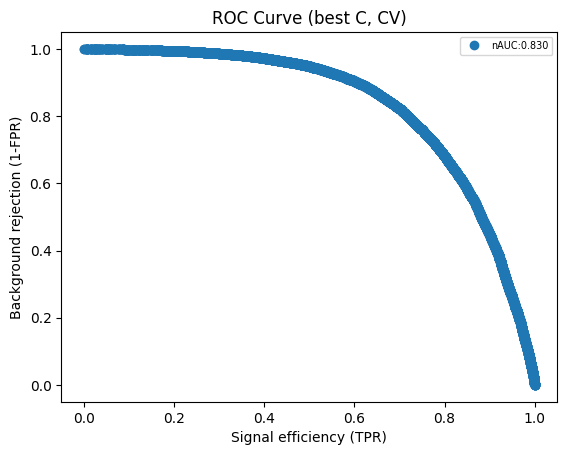

In [18]:
fpr, tpr, _ = roc_curve(y_test, probs)
auc = roc_auc_score(y_test, probs)

plt.plot(tpr, 1-fpr, 'o', label=f'nAUC:{auc:.3f}') # ready: tpr, 1-fpr
plt.xlabel('Signal efficiency (TPR)')
plt.ylabel('Background rejection (1-FPR)')
plt.legend(fontsize='x-small')
plt.title('ROC Curve (best C, CV)')
plt.show()



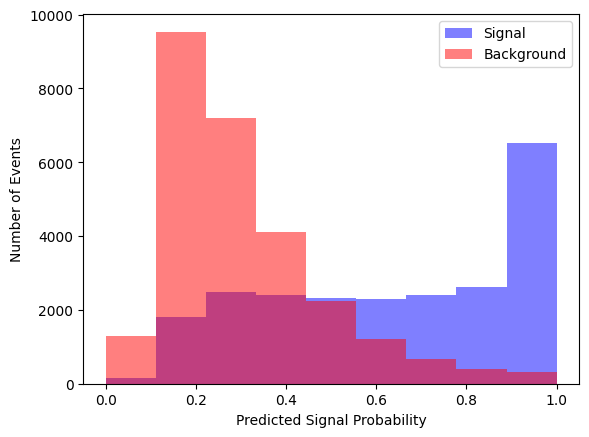

In [19]:
plt.hist(probs[y_test==1], bins=np.linspace(0,1,10), color='b', alpha=0.5, label='Signal')
plt.hist(probs[y_test==0], bins=np.linspace(0,1,10), color='r', alpha=0.5, label='Background')
plt.xlabel('Predicted Signal Probability according high significance parameters')
plt.ylabel('Number of Events')
plt.title("Logistic Regression Seperation")
plt.legend()
plt.show()

# 18 column

In [20]:
nvar =18
X_train, y_train = get_X_y(df_train, nvar)
X_test, y_test = get_X_y(df_test, nvar)

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
lr = LogisticRegression()

grid = GridSearchCV(
    lr,
    param_grid,
    scoring='roc_auc',   # Use ROC AUC as scoring
    cv=5,                #5-fold cross-validation
    n_jobs=-1            # Use all processors
)
grid.fit(X_train, y_train)



/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solve

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'max_iter': [2000],
                         'penalty': ['l2', 'l1'],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='roc_auc')

In [23]:
# Best hyperparameters and corresponding score
print(f'Best C: {grid.best_params_["C"]}')
print(f'Best CV ROC AUC: {grid.best_score_:.3f}')


Best C: 0.1
Best CV ROC AUC: 0.856


In [24]:
# 3. Evaluate on Test set with best found model
best_lr = grid.best_estimator_
probs = best_lr.predict_proba(X_test)[:, 1]


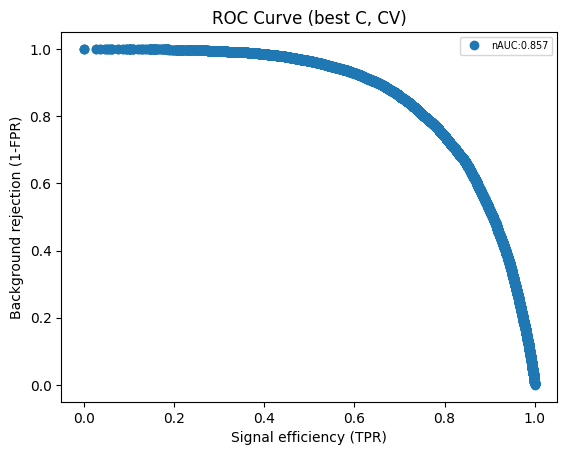

In [25]:
fpr, tpr, _ = roc_curve(y_test, probs)
auc = roc_auc_score(y_test, probs)

plt.plot(tpr, 1-fpr, 'o', label=f'nAUC:{auc:.3f}') # ready: tpr, 1-fpr
plt.xlabel('Signal efficiency (TPR)')
plt.ylabel('Background rejection (1-FPR)')
plt.legend(fontsize='x-small')
plt.title('ROC Curve (best C, CV)')
plt.show()


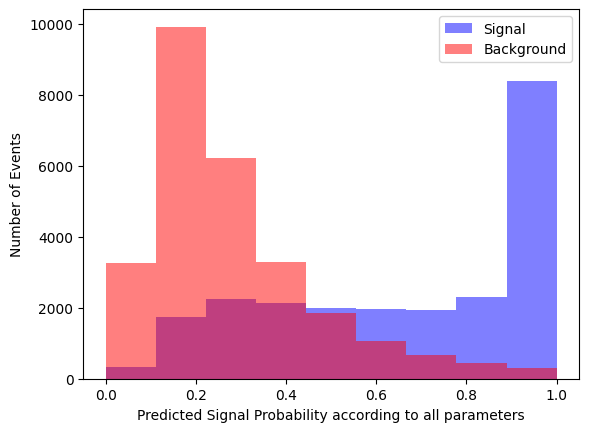

In [26]:
plt.hist(probs[y_test==1], bins=np.linspace(0,1,10), color='b', alpha=0.5, label='Signal')
plt.hist(probs[y_test==0], bins=np.linspace(0,1,10), color='r', alpha=0.5, label='Background')
plt.xlabel('Predicted Signal Probability according to all parameters')
plt.ylabel('Number of Events')
plt.title("Logistic Regression Seperation ")

plt.legend()
plt.show()